In [1]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

Mounted at /drive


In [31]:
HOME = "/drive/My Drive/Susun Jadwal/Data csv/"

user_sched = pd.read_csv(HOME+"user_schedule.csv")
user_sched.head(2)

,id_schedule,user_id,name,created_at,deleted
0,6104d2cf8aadd383ec57d3c3,60f4f2b38cd53dc0e3b371ba,212/plan-1,2021-07-31T04:34:23.663Z,False
1,6104d66a8aadd383ec57d3c4,60f58061752be98a2e59f66a,Bismillah Sem 3,2021-07-31T04:49:46.213Z,False


In [7]:
user_sched['user_id'].nunique()

3341

In [32]:
user_sched.query("user_id=='60f4f2b38cd53dc0e3b371ba'").duplicated("user_id")

0       False
26       True
396      True
397      True
5091     True
dtype: bool

In [33]:
user_sched['changed'] = user_sched.duplicated("user_id")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


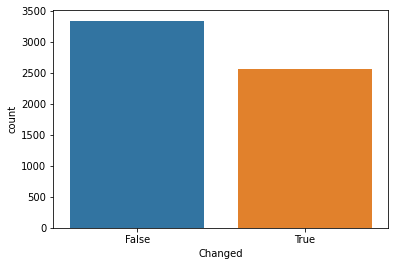

In [26]:
sns.countplot(user_sched['changed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


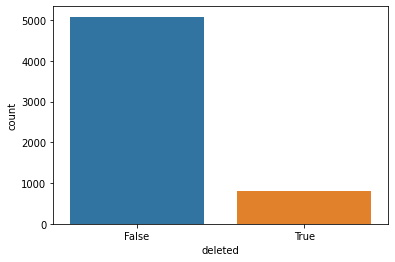

In [27]:
sns.countplot(user_sched['deleted'])

In [ ]:
!pip install pandasql --quiet

In [30]:
user = pd.read_csv(HOME+"user.csv")

In [45]:
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())

q = """
SELECT * 
FROM user
join user_sched
using(user_id)
"""

joined_df = sql(q)
joined_df

,name,username,npm,batch,user_id,major,last_update_course_at,id_schedule,name,created_at,deleted,changed
0,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,6104d2cf8aadd383ec57d3c3,212/plan-1,2021-07-31T04:34:23.663Z,0,0
1,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,6106187f8aadd383ec57d3f5,Rename,2021-08-01T03:43:59.179Z,1,1
2,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,6108db9e8aadd383ec57d818,212/plan-2,2021-08-03T06:01:02.473Z,0,1
3,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,6108df828aadd383ec57d81d,212/plan-3,2021-08-03T06:17:38.081Z,0,1
4,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,61129254a4fd317044ab878a,212/plan-4,2021-08-10T14:51:00.248Z,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5895,Munifah Nurfadhilah,munifah.nurfadhilah,2.106655e+09,2021.0,611f3fa3a4fd317044ab8c20,60f505258cd53dc0e3b371d4,None,611f4018a4fd317044ab8c21,kelas pudil,2021-08-20T05:39:36.022Z,0,0
5896,Ghifari Hafiz Widyawan,ghifari.hafiz,2.106658e+09,2021.0,611f4618a4fd317044ab8c24,61065e6a8aadd383ec57d427,2021-08-20T06:05:41.037Z,611f470ea4fd317044ab8c25,Semester 1,2021-08-20T06:09:18.096Z,0,0
5897,Muhammad Fauzan Rizky Ramadhan,muhammad.fauzan15,2.106654e+09,2021.0,611fb7fea4fd317044ab8c2d,60f505258cd53dc0e3b371d4,None,611fb947a4fd317044ab8c2e,None,2021-08-20T14:16:39.479Z,0,0
5898,DARIAN TEXANDITAMA,darian.texanditama,1.806205e+09,2018.0,611fbe18a4fd317044ab8c2f,60f4f2b38cd53dc0e3b371b9,None,611fbe79a4fd317044ab8c30,None,2021-08-20T14:38:49.795Z,0,0


In [54]:
tmp = joined_df.value_counts('batch').sort_index()
tmp

batch
2000.0       2
2013.0       2
2015.0       1
2016.0       3
2017.0      70
2018.0     926
2019.0    2040
2020.0    1858
2021.0     998
dtype: int64

In [72]:
modify_df = (joined_df.groupby('batch')[['deleted','changed']].sum() / tmp.values.reshape(-1,1) * 100)\
            .reset_index().query("batch>2016")
modify_df

,batch,deleted,changed
4,2017.0,17.142857,47.142857
5,2018.0,13.066955,41.792657
6,2019.0,13.382353,45.784314
7,2020.0,15.123789,46.770721
8,2021.0,12.725451,33.466934


In [85]:
melted_df = pd.melt(modify_df, id_vars="batch", var_name='modified')

(0.0, 100.0)

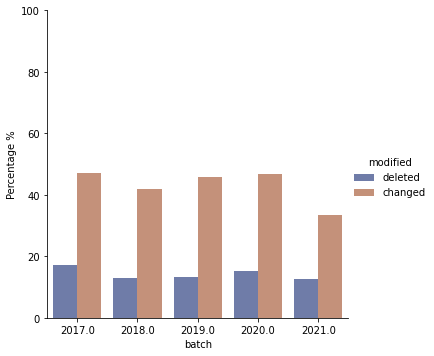

In [91]:
sns.catplot(
    data=melted_df, kind="bar",
    x="batch", y="value", hue="modified",
    ci="sd", palette="dark", alpha=.6, height=5)

plt.ylabel("Percentage %");
plt.ylim([0,100])

In [93]:
modify_df = joined_df.groupby('batch')[['deleted','changed']].sum()\
            .reset_index().query("batch>2016")
modify_df

,batch,deleted,changed
4,2017.0,12,33
5,2018.0,121,387
6,2019.0,273,934
7,2020.0,281,869
8,2021.0,127,334


In [94]:
melted_df = pd.melt(modify_df, id_vars="batch", var_name='modified')

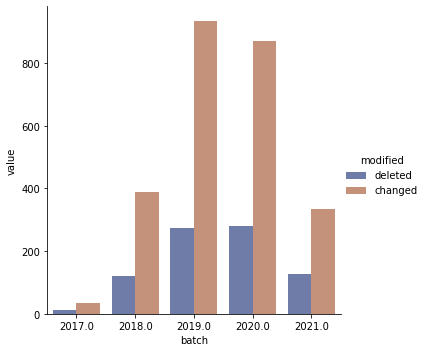

In [96]:
sns.catplot(
    data=melted_df, kind="bar",
    x="batch", y="value", hue="modified",
    ci="sd", palette="dark", alpha=.6, height=5)